<a href="https://colab.research.google.com/github/incerasita/ADA/blob/main/SVD_and_Embeddings_Illustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Value Decomposition
Singular value decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three matrices: a left singular matrix, a diagonal matrix of singular values, and a right singular matrix. The left singular matrix and the right singular matrix are orthogonal matrices, which means that their columns are orthonormal vectors. The diagonal matrix of singular values contains the singular values of the original matrix, which are non-negative real numbers.

Suppose we have a dataset containing information about the ratings that various users have given to a set of movies. The dataset can be represented as a matrix, where each row corresponds to a user and each column corresponds to a movie, and the entries of the matrix represent the ratings given by users to the corresponding movies.

$$
\begin{bmatrix}
 & Movie1 & Movie2 & Movie3 & Movie4 \\
User1	& 4 &	2	&3 &	3 \\
User2	& 1	& 5	& 4& 	5\\
User3	& 2	& 3& 	1	& 1\\
User4	& 1	& 4	& 2	& 2\\
User5	& 3	& 5	& 4	& 3\\
\end{bmatrix}
$$

The matrix can be re
presented as:

$$
A = \begin{bmatrix}
4 & 2 & 3 & 3 \\
1 & 5 & 4 & 5 \\
2 & 3 & 1 & 1 \\
1 & 4 & 2 & 2 \\
3 & 5 & 4 & 3
\end{bmatrix}
$$

Given an $m$ X $n$ matrix $A$ (in the example above $m$=5 and $n$=4), there exist three matrices $U$, $S$, and $V$ such that:

$$ A=USV^T$$

where:

$V^T$ is the transpose of $V$

$U$ is an $m$ X $n$ orthogonal matrix, where the columns are the left singular vectors of $A$

$S$ is an $n$ X $n$ diagonal matrix, where the diagonal entries are the singular values of $A$

$V$ is an $n$ X $n$ orthogonal matrix, where the columns are the right singular vectors of $A$

$V^T$ is the transpose of $V$

We will represent movie ratings as a matrix and use Singular Value Decomposition (SVD) to create compressed representations of the movies. The code starts by creating a matrix of movie ratings where each row represents a user and each column represents a movie.


Which terms seem to be close to each other in the document but we still not know which word come before/after

In [1]:
import numpy as np

# Create a matrix with movie ratings
movie_matrix = np.array([
    [4, 2, 3, 3],
    [1, 5, 4, 5],
    [2, 3, 1, 1],
    [1, 4, 2, 2],
    [3, 5, 4, 3]
])


## Apply SVD to the Movie Matrix

In [2]:
from numpy.linalg import svd

# Perform SVD on the movie matrix
U, S, VT = svd(movie_matrix)

In [3]:
U

array([[-0.40738613,  0.76867061,  0.36595456,  0.20891551, -0.25615153],
       [-0.57717123, -0.53519764,  0.51475908,  0.23860896,  0.24192089],
       [-0.2600408 ,  0.13960276, -0.61987425,  0.58854544,  0.42691922],
       [-0.35235925, -0.29931144, -0.37659292,  0.09673914, -0.79691589],
       [-0.55599609,  0.11675923, -0.27392341, -0.7373438 ,  0.24192089]])

In [4]:
S

array([13.72216912,  3.20496015,  2.21593642,  0.72106239])

In [7]:
S[0]

13.722169115389192

In [5]:
VT

array([[-0.34594712, -0.63183657, -0.4896884 , -0.49123153],
       [ 0.89537979, -0.41600777,  0.05405311, -0.1493681 ],
       [-0.20737703, -0.64528339,  0.31054423,  0.66645809],
       [ 0.18870714,  0.10643979, -0.81292424,  0.54056856]])

## Check the Equality by Multiplying $U$, $S$, and $V^T$


In [6]:
S_matrix = np.diag(S)
# Multiply U, S, and V^T to get the original matrix
reconstructed_matrix = np.dot(U[:, :4], np.dot(S_matrix, VT))
print(reconstructed_matrix)


[[4. 2. 3. 3.]
 [1. 5. 4. 5.]
 [2. 3. 1. 1.]
 [1. 4. 2. 2.]
 [3. 5. 4. 3.]]


##Create Lower-Dimensional Representations
Next, we create one-dimensional, two-dimensional, and three-dimensional vector representations of the movies. For the one-dimensional case, we extract the first column of $V$ and multiply it with the first element of the diagonal matrix $S$. The resulting movie_vectors are then plotted, showing that movies 2 and 4 are similar.

### One-dimension

[-4.74714488 -8.67016827 -6.71958697 -6.74076211]


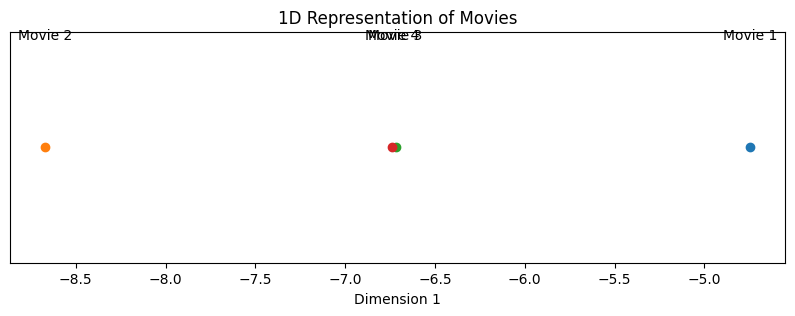

In [8]:
#multiply first row of VT matrix with S

# Get the first column of V (from V^T, so it's the first row of VT)
V1 = VT[0, :]

# Multiply the first singular value with this vector
one_dim_representation = S[0] * V1
print(one_dim_representation)

import matplotlib.pyplot as plt

movies = ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4']
# For 1D plot
plt.figure(figsize=(10, 3))
for i, (x, label) in enumerate(zip(one_dim_representation, movies)):
    plt.scatter(x, 0, marker='o')  # Plot each point at x with a baseline of y=0
    plt.text(x, 0.05, label, ha='center', va='bottom')  # Adjust text alignment and position

plt.title("1D Representation of Movies")
plt.xlabel("Dimension 1")
plt.yticks([])  # Hide y-axis as it's not meaningful in 1D plot
plt.show()

#Number of each movie
#Movie 3,4 close to each others as their ratings seem to be not different to each other

### Two dimensions

[[-4.74714488  2.86965655]
 [-8.67016827 -1.33328832]
 [-6.71958697  0.17323806]
 [-6.74076211 -0.47871881]]


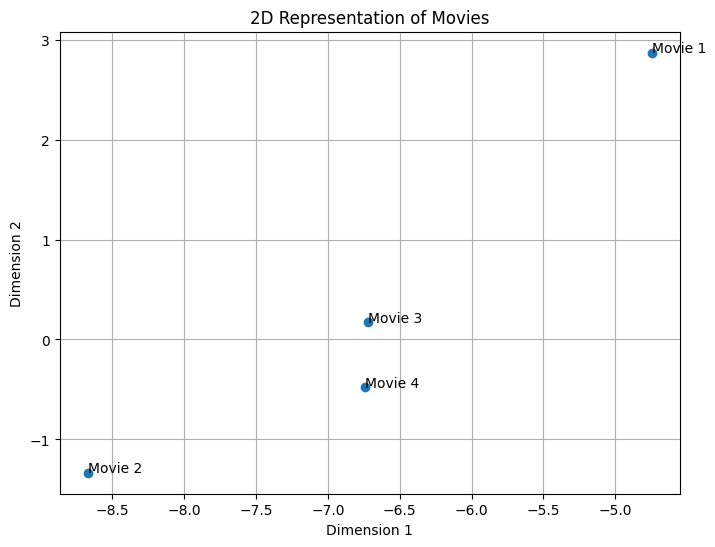

In [9]:
# Get the first two columns of V (first two rows of VT)
V2 = VT[:2, :]

# Multiply the first two singular values with these vectors
two_dim_representation = np.dot(np.diag(S[:2]), V2)
print(two_dim_representation.T)


# For 2D plot
plt.figure(figsize=(8, 6))
plt.scatter(two_dim_representation[0, :], two_dim_representation[1, :])
for i, txt in enumerate(['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4']):
    plt.annotate(txt, (two_dim_representation[0, i], two_dim_representation[1, i]))
plt.title("2D Representation of Movies")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

#represent movie concept with difffernt matrix

## Three dimensions

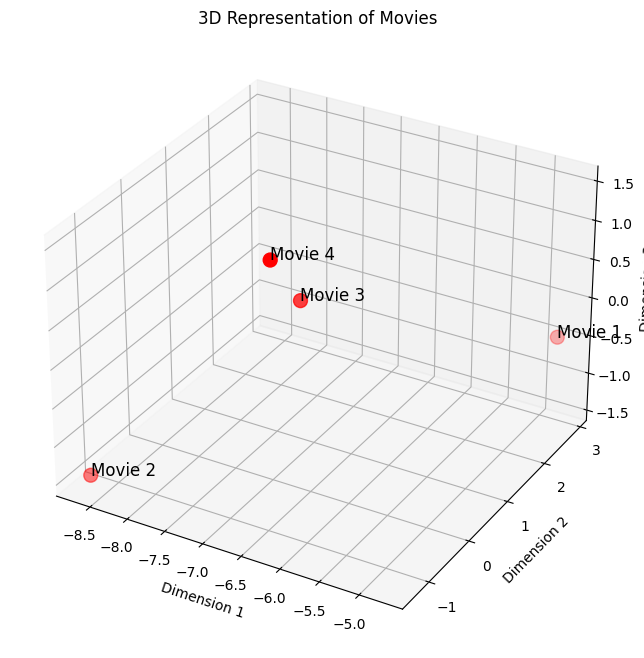

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import svd

# Extract the first three singular vectors from V (transposed, so take from VT)
V3 = VT[:3, :]

# Multiply the first three singular values (diagonal matrix) with the corresponding vectors
three_dim_representation = np.dot(np.diag(S[:3]), V3)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Movies and their names
movies = ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4']
x, y, z = three_dim_representation[0], three_dim_representation[1], three_dim_representation[2]

ax.scatter(x, y, z, marker='o', s=100, c='red')

# Annotate each point in 3D space
for (i, txt) in enumerate(movies):
    ax.text(x[i], y[i], z[i], txt, size=12, color='black')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Representation of Movies')

plt.show()


The lower-dimensional vector representations of the movies capture the relationships between the movies based on the patterns of movie ratings provided by the users. The SVD algorithm identifies latent factors that contribute to the patterns of ratings across the movies, and these factors are represented by the vectors. The vectors provide a compressed representation of the original data, capturing the relationships between the movies in a lower-dimensional space. This allows us to visualize these relationships and identify groups of movies that have similar ratings. By reducing the dimensionality of the data, SVD enables us to more easily identify underlying patterns and relationships between the movies, which can be useful for tasks such as recommendation systems.

SVD can be used to obtain word embeddings in NLP by applying it to a document-term matrix, where each row represents a document and each column represents a unique term in the corpus. The resulting SVD factorization provides a lower-dimensional representation of the original matrix, with the columns of the U matrix representing the document embeddings and the rows of the V matrix representing the term embeddings. The values in the S matrix represent the importance or weight of each dimension. By taking the top k dimensions with the highest weights, we can obtain a lower-dimensional representation of the original matrix. These term embeddings capture the semantic meaning and relationships between words in the corpus, allowing us to better understand the underlying structure of the language.


#Word2Vec
In practise, word2vec, a neural network-based approach for generating word embeddings is more commonly used. It is a two-layer neural network that takes in a large corpus of text as input and outputs a vector representation for each word in the vocabulary. The key idea behind word2vec is to learn word embeddings that capture not just syntactic, but also semantic relationships between words.
There are two main architectures for word2vec: Continuous Bag of Words (CBOW) and Skip-gram. In CBOW, the model tries to predict the current word based on its context (the surrounding words), while in skip-gram, the model tries to predict the context words based on the current word. Both models use a sliding window approach to define the context.
One of the advantages of word2vec over SVD-based approaches is that it can learn more complex relationships between words, beyond just co-occurrence statistics. Additionally, word2vec can capture more nuanced relationships between words, such as analogies (e.g. “man is to woman as king is to queen”). However, word2vec requires more training data and computational resources compared to SVD.
